In [8]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
db=mysql.connector.connect(host="localhost",user="root",password="@Amanaman321",database="ecommerce")

In [10]:
cus=db.cursor()

In [11]:
cus.execute("select * from CUSTOMER1") # customer table 1
#data=cus.fetchall()
#print(data)
customer_data=pd.DataFrame(cus.fetchall(),columns=[desc[0] for desc in cus.description])
print(customer_data.head()) # top 5 record

  customer_id     name              city                  email    phone_no  \
0       C1001    Steve             Tokyo        steve@gmail.com  4567897652   
1       C1002     john            Sydney         john@gmail.com  9987234567   
2       C1003    Peter          Kanagawa  peter.parker@mail.com  9969834567   
3       C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567   
4       C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678   

                    address  pin_code  
0                  f.g.road        99  
1                  k.c.road     75001  
2             2F Ikenobecho       171  
3           24-2, Sendagaya      8429  
4  1520 E Buena Vista Drive     32830  


In [13]:
print(customer_data['city'].value_counts())        # city wise customer details

city
Tokyo               22
Kanagawa            18
Sydney              12
Lake Buena Vista    10
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x227903827b0>,
 [Text(0.4844335208866584, 0.9875850160069034, ''),
  Text(-1.0999999999999959, -9.616505800409723e-08, ''),
  Text(-0.0557138249210145, -1.0985881711144858, ''),
  Text(0.9617813019850276, -0.5338321151373202, '')])

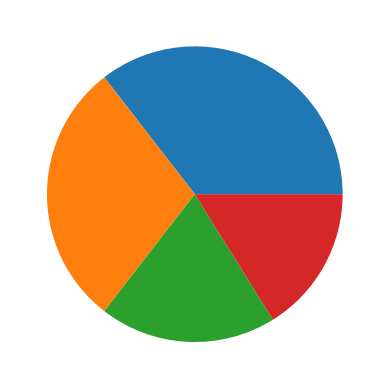

In [17]:
plt.pie(customer_data['city'].value_counts())         # pie diagram of city wise customer details(matplotlib)

<Axes: xlabel='city'>

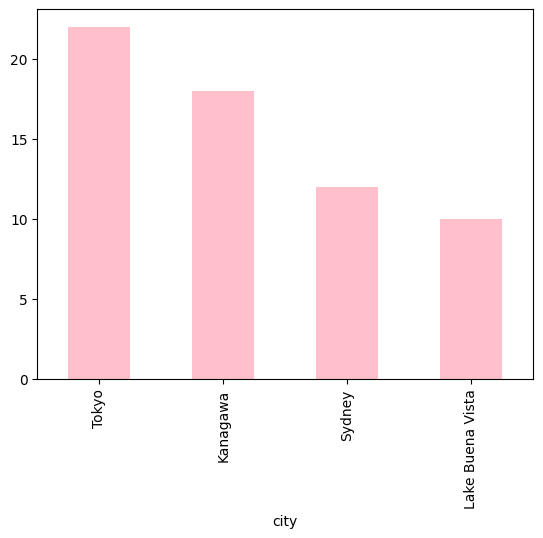

In [36]:
df=(customer_data['city'].value_counts())   # bar diagram of city wise customer details(matplotlib)
df.plot(kind='bar', color='pink')
#df.plot(kind='bar', color='pink')  # kind=bar,line,scatter

In [15]:
cus.execute("select * from PRODUCTS1")  # products table 2
#data=cus.fetchall()
#print(data)
product_data=pd.DataFrame(cus.fetchall(),columns=[desc[0] for desc in cus.description])
print(product_data.head())

  product_id product_name     category sub_category  original_price  \
0       P102        Chair    furniture       Chairs         20000.0   
1       P103       Laptop  Electronics     computer         60000.0   
2       P104   Smartphone  Electronics        phone         45000.0   
3       P105      Blender    Appliance  Electronics           500.0   
4       P106    Laptop HP  Electronics    Computers         67200.0   

   selling_price  stock  
0       15000.00     10  
1       55000.00     50  
2       40000.00     20  
3         450.00     10  
4       55000.99     50  


In [37]:
cus.execute("select * from order_details1")  # order details table 3
order_data=pd.DataFrame(cus.fetchall(),columns=[desc[0] for desc in cus.description])
print(order_data.head())
# data=cus.fetchall()
# print(data)

   order_id customer_id product_id  quantity  total_price payment_mode  \
0         3       C1004       P112       1.0       1000.0          COD   
1         4       C1005       P102       1.0      20000.0          COD   
2         5       C1005       P102       1.0      20000.0          COD   
3         7       C1006       P103       1.0      55000.0          COD   
4         8       C1006       P102       1.0      15000.0          COD   

  order_date order_status  
0 2023-11-30      Pending  
1 2023-11-30      Pending  
2 2023-12-08    Delivered  
3 2023-12-15    Delivered  
4 2023-12-01    delivered  


customer_id
C1005    3
C1010    3
C1009    3
C1013    3
C1006    2
C1008    2
C1003    2
C1014    2
C1011    2
C1015    2
Name: count, dtype: int64


<Axes: xlabel='customer_id'>

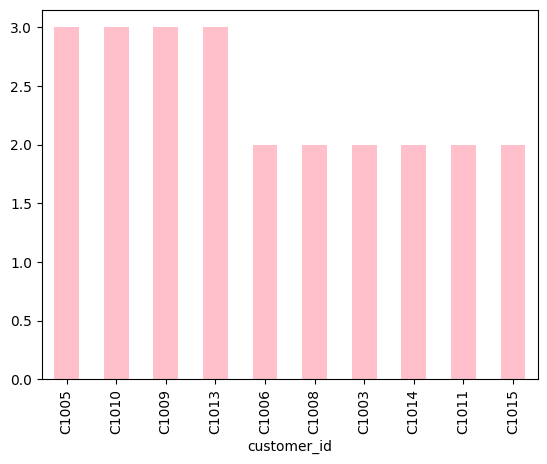

In [47]:
df=order_data['customer_id'].value_counts().head(10) #  Top 10 details , Determine the total number of products(no. of order) available by customer_id.
print(df.head(10))
df.plot(kind='bar', color='pink')  # bar diagram